For my final project, I aimed to answer the question: “Do my listening habits differ from others in terms of emotion?” After exploring the data, my question shifted to: “How does the Spotify emotional data of my personal listening history compare to the top 10 songs during the week of 4/21/22?” I also sought to answer some other questions related to the measurement of emotional data. These questions are: “Does an increase in tempo mean an increase in valence?” and “Does an increase in tempo mean an increase in danceability?”. Spotify gathers an immense amount of data regarding a song’s musical information, such as tempo, key, timbre, and various other measurements to compute the track’s valence. According to Spotify, valence is defined as “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”. I wanted to use this value to compare my music to others, and to assess how strong a song’s tempo can be in a song measurement.

As someone who listens to heavier music year-round, I am curious to put both my and the listening chart's top 10 tracks side by side and examine each track's emotional data that spotify measures. To do this, I must begin by accessing Spotify's API.

The below code is the spotifyAPIExample available on Canvas. I used this to setup the spotify api requests.

In [25]:
import requests

clientID = "73959e0cf079471d889248b2b9c97b08" # your client ID here
clientSecret = "053c647cf41d42518450eebfbc0a1567" # your client secret here

grantType = 'client_credentials'

#Request based on Client Credentials Flow from https://developer.spotify.com/web-api/authorization-guide/

#Request body parameter: grant_type Value: Required. Set it to client_credentials
bodyParams = {'grant_type' : grantType}

url='https://accounts.spotify.com/api/token'

response=requests.post(url, data=bodyParams, auth = (clientID, clientSecret)).json()
# print (response) # this response should be a json object (dictionary) with an access_token key. # you'll need
# the access token key in subsequent calls. you can access it using response["access_token"]

headers = {"Authorization": "Bearer "+response["access_token"]} # you'll use this in your subsequent requests

# example request
mastodonSearch=requests.get("https://api.spotify.com/v1/search?q=Mastodon&type=artist", headers=headers).json()
mastodonSearch

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Mastodon&type=artist&offset=0&limit=20',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Dvfqq39HxvCJ3GvfeIFuT'},
    'followers': {'href': None, 'total': 730175},
    'genres': ['alternative metal',
     'atlanta metal',
     'hard rock',
     'metal',
     'nu metal',
     'progressive groove metal',
     'progressive sludge',
     'rock',
     'sludge metal',
     'stoner metal'],
    'href': 'https://api.spotify.com/v1/artists/1Dvfqq39HxvCJ3GvfeIFuT',
    'id': '1Dvfqq39HxvCJ3GvfeIFuT',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5ebf84fe9e6fbb2aa001d6cbbd9',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab67616100005174f84fe9e6fbb2aa001d6cbbd9',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f178f84fe9e6fbb2aa001d6cbbd9',
      'width': 160}],
    'name': 'Mastodon',
    'popul

Now that we can access the API, we must gather the specific Song ID from the top tracks of the current week (4/21/22). For this data, I will be downloading the CSV available at spotifycharts.com. Here is a preview of the CSV.

In [26]:
import pandas as pd
import numpy as np

chartsPreview = pd.read_csv("TOPCHARTS.CSV", header=None)
#creates dataframe from the csv
chartsPreview.head(5)

,0,1,2,3,4
0,NaN,NaN,NaN,Note that these figures are generated using a ...,NaN
1,Position,Track Name,Artist,Streams,URL
2,1,As It Was,Harry Styles,67265741,https://open.spotify.com/track/4LRPiXqCikLlN15...
3,2,First Class,Jack Harlow,50438229,https://open.spotify.com/track/1rDQ4oMwGJI7B4t...
4,3,Heat Waves,Glass Animals,29307788,https://open.spotify.com/track/02MWAaffLxlfxAU...


To gather song data using the API, we must extract the unique song IDs from the dataframe. To do this, we will create a series object of the song IDs, then convert it into a list.

In [27]:
songID = chartsPreview[4] # creates a series object of the track URL column
print(type(songID))
songID

<class 'pandas.core.series.Series'>


0                                                    NaN
1                                                    URL
2      https://open.spotify.com/track/4LRPiXqCikLlN15...
3      https://open.spotify.com/track/1rDQ4oMwGJI7B4t...
4      https://open.spotify.com/track/02MWAaffLxlfxAU...
                             ...                        
197    https://open.spotify.com/track/0B7wvvmu9EISAwZ...
198    https://open.spotify.com/track/3rq5w4bQGigXOfd...
199    https://open.spotify.com/track/285pBltuF7vW8Te...
200    https://open.spotify.com/track/2BEcap3xJtmiPaH...
201    https://open.spotify.com/track/2VxeLyX666F8uXC...
Name: 4, Length: 202, dtype: object

In [28]:
songIDList = songID.to_list() # turns the series object into a list
print(songIDList)

[nan, 'URL', 'https://open.spotify.com/track/4LRPiXqCikLlN15c3yImP7', 'https://open.spotify.com/track/1rDQ4oMwGJI7B4tovsBOxc', 'https://open.spotify.com/track/02MWAaffLxlfxAUY7c5dvx', 'https://open.spotify.com/track/5PjdY0CKGZdEuoNab3yDmX', 'https://open.spotify.com/track/1HhNoOuqm1a5MXYEgAFl8o', 'https://open.spotify.com/track/3FkeNbs9Zeiqkr3WkbOiGp', 'https://open.spotify.com/track/2DB4DdfCFMw1iaR6JaR03a', 'https://open.spotify.com/track/5Z9KJZvQzH6PFmb8SNkxuk', 'https://open.spotify.com/track/7rglLriMNBPAyuJOMGwi39', 'https://open.spotify.com/track/4fouWK6XVHhzl78KzQ1UjL', 'https://open.spotify.com/track/1O2pcBJGej0pmH2Y9XZMs6', 'https://open.spotify.com/track/1ri9ZUkBJVFUdgwzCnfcYs', 'https://open.spotify.com/track/6I3mqTwhRpn34SLVafSH7G', 'https://open.spotify.com/track/58HvfVOeJY7lUuCqF0m3ly', 'https://open.spotify.com/track/6mmPpaltUZK7xjNlBPQQ0p', 'https://open.spotify.com/track/2gpQi3hbcUAcEG8m2dlgfB', 'https://open.spotify.com/track/6Uj1ctrBOjOas8xZXGqKk4', 'https://open.spot

Now that we have a list containing each song ID, we can gather specific song data from the API. In order to simplify the data collection process, I will be gathering data from the first 10 songs in the Top Charts and my personal listening data. Below, I will show the steps to acquire the 'valence', 'danceability', and 'tempo' of the songs.

In [29]:
#newSongID = [x.replace('https://open.spotify.com/track/','') for x in songIDList]

chartIDList = [] # list to store the top 10 tracks' IDs
for i in range(2,12): # for loop to capture the top 10 tracks, begins at 2 to eliminate 'nan' and 'URL' from the list
    chartIDList.append(songIDList[i].replace('https://open.spotify.com/track/',''))# replaces the url with nothing
    # then adds the ID to the chart list

chartIDList

['4LRPiXqCikLlN15c3yImP7',
 '1rDQ4oMwGJI7B4tovsBOxc',
 '02MWAaffLxlfxAUY7c5dvx',
 '5PjdY0CKGZdEuoNab3yDmX',
 '1HhNoOuqm1a5MXYEgAFl8o',
 '3FkeNbs9Zeiqkr3WkbOiGp',
 '2DB4DdfCFMw1iaR6JaR03a',
 '5Z9KJZvQzH6PFmb8SNkxuk',
 '7rglLriMNBPAyuJOMGwi39',
 '4fouWK6XVHhzl78KzQ1UjL']

In [30]:
chartValenceList = [] # list to store the valence data
chartTempoList = [] # list to store the tempo data
chartDanceList = [] # list to store the danceability data

for i in range(len(chartIDList)): # for loop running within the length of the chart id list
    currentRequest = requests.get("https://api.spotify.com/v1/audio-features/"+str(chartIDList[i]), headers=headers).json()
    # requests the current ID in the for loop, headers is required for authentication
    #print(currentRequest)
    chartValenceList.append(currentRequest['valence']) # accesses the dictionary for valence and adds it to the list
    chartTempoList.append(currentRequest['tempo']) # same as above but for tempo
    chartDanceList.append(currentRequest['danceability']) # same as above but for danceability
    
print(chartDanceList)
print(chartTempoList)
print(chartValenceList)

[0.52, 0.905, 0.761, 0.591, 0.728, 0.812, 0.756, 0.741, 0.795, 0.695]
[173.93, 106.998, 80.87, 169.928, 77.011, 91.993, 94.996, 150.087, 116.032, 121.932]
[0.662, 0.324, 0.531, 0.478, 0.555, 0.396, 0.956, 0.892, 0.934, 0.415]


From the code above, we have accessed the API to produce lists of the danceability, tempo, and valence of the top 10 tracks listened to during the week of 4/21/22. Now, we must access my personal json file containing my listening history. We will collect data from the first ten tracks.

In [31]:
personalHistory = pd.read_json("StreamingHistory3.json")
personalHistory

,endTime,artistName,trackName,msPlayed
0,2022-04-21 03:42,San Holo,heal (↑%),221500
1,2022-04-21 03:46,Calvin Harris,Outside (feat. Ellie Goulding),227266
2,2022-04-21 03:51,Daft Punk,Digital Love,301373
3,2022-04-21 03:56,Daft Punk,One More Time,320357
4,2022-04-21 04:00,Lemaitre,Stepping Stone,256418
...,...,...,...,...
374,2022-04-22 23:28,Spiritbox,Perennial,246480
375,2022-04-22 23:31,Currents,Let Me Leave,201011
376,2022-04-22 23:35,Currents,Poverty of Self,205669
377,2022-04-22 23:39,Currents,Origin,244768


As we can see from the above file preview, the JSON file provided by spotify does not include the specific track ID with each track I have listened to. This means I will have to search each track using the api, and extract the track ID from there.

For the sake of creating more interesting data, I will be using 0-4 tracks and 374-378 (the tracks shown in the preview).

I picked another song, Bleach Bath by Spiritbox, to replace Origin by Currents, as the API search was too long to find the track ID I needed.

I frequently repeat these songs, so the data will not be inaccurate when comparing it to the Top 10 charts data. I am choosing these specific songs to gather a more diverse set of genres (0-4 is electronic, 374-378 is metal).

Due to the missing track ID in the JSON file given by Spotify, I will be making individual requests to search each track by name, finding the corresponding dictionary for said track, finding the ID, then adding specific dance, tempo, and valence stats to lists.

In [32]:
trackNames = ["heal (↑%)","Outside (feat. Ellie Goulding)", "Digital Love", "One More Time" ,"Stepping Stone", "Perennial",
             "Let Me Leave", "Poverty of Self", "Bleach Bath", "I Have a Problem"]

# I created a list of the track names in order to streamline the process of making individual requests.

# Request for track one

personalDanceList = []
personalTempoList = []
personalValenceList = []
# Creating the lists to hold the values for Dance, Tempo, and Valence for each song.

historyRequest = requests.get("https://api.spotify.com/v1/search?q="+trackNames[0]+"&type=track", headers=headers).json()
#historyRequest
variable=historyRequest['tracks']
anotherVariable = variable['items']
anotherVariable[1]['id']

# Here, I am requesting the API search with the track name. Then, I create the variables "Variable" and "anotherVariable" 
# to access the specific dictionarys I need. From there, I iterate through the list and access the "id" key
# to find the track ID for the specific song.

testRequest = requests.get("https://api.spotify.com/v1/audio-features/"+anotherVariable[1]['id'], headers=headers).json()
testRequest

# This is the same request used for the Top 10 Charts tracks. I call the desired ID and retrieve the track's specific stats.

personalValenceList.append(testRequest['valence']) # accesses the dictionary for valence and adds it to the list
personalTempoList.append(testRequest['tempo']) # same as above but for tempo
personalDanceList.append(testRequest['danceability']) # same as above but for danceability

print(personalValenceList)
print(personalTempoList)
print(personalDanceList)
# I print the lists after each run to make sure the values are being added.

[0.212]
[128.28]
[0.512]


In [33]:
# Request for track two, same exact code as above

historyRequest = requests.get("https://api.spotify.com/v1/search?q="+trackNames[1]+"&type=track", headers=headers).json()
#historyRequest
variable=historyRequest['tracks']
anotherVariable = variable['items']
anotherVariable[0]['id']

testRequest = requests.get("https://api.spotify.com/v1/audio-features/"+anotherVariable[0]['id'], headers=headers).json()
#testRequest

personalValenceList.append(testRequest['valence']) # accesses the dictionary for valence and adds it to the list
personalTempoList.append(testRequest['tempo']) # same as above but for tempo
personalDanceList.append(testRequest['danceability']) # same as above but for danceability

print(personalValenceList)
print(personalTempoList)
print(personalDanceList)

[0.212, 0.418]
[128.28, 128.035]
[0.512, 0.646]


In [34]:
# Request for track three, same exact code as above

historyRequest = requests.get("https://api.spotify.com/v1/search?q="+trackNames[2]+"&type=track", headers=headers).json()
#historyRequest
variable=historyRequest['tracks']
anotherVariable = variable['items']
anotherVariable[0]['id']

testRequest = requests.get("https://api.spotify.com/v1/audio-features/"+anotherVariable[0]['id'], headers=headers).json()
#testRequest

personalValenceList.append(testRequest['valence']) # accesses the dictionary for valence and adds it to the list
personalTempoList.append(testRequest['tempo']) # same as above but for tempo
personalDanceList.append(testRequest['danceability']) # same as above but for danceability

print(personalValenceList)
print(personalTempoList)
print(personalDanceList)

[0.212, 0.418, 0.53]
[128.28, 128.035, 124.726]
[0.512, 0.646, 0.644]


In [35]:
# Request for track four, same exact code as above

historyRequest = requests.get("https://api.spotify.com/v1/search?q="+trackNames[3]+"&type=track", headers=headers).json()
#historyRequest
variable=historyRequest['tracks']
anotherVariable = variable['items']
anotherVariable[0]['id']

testRequest = requests.get("https://api.spotify.com/v1/audio-features/"+anotherVariable[0]['id'], headers=headers).json()
#testRequest

personalValenceList.append(testRequest['valence']) # accesses the dictionary for valence and adds it to the list
personalTempoList.append(testRequest['tempo']) # same as above but for tempo
personalDanceList.append(testRequest['danceability']) # same as above but for danceability

print(personalValenceList)
print(personalTempoList)
print(personalDanceList)

[0.212, 0.418, 0.53, 0.476]
[128.28, 128.035, 124.726, 122.746]
[0.512, 0.646, 0.644, 0.613]


In [36]:
# Request for track five, same exact code as above

historyRequest = requests.get("https://api.spotify.com/v1/search?q="+trackNames[4]+"&type=track", headers=headers).json()
#historyRequest

#6qsjIsKDkpnb8Z1UxozO8O
variable=historyRequest['tracks']
anotherVariable = variable['items']
anotherVariable[6]['id']
# List has an index of 6 due to the amount of tracks with the name "Stepping Stone"

testRequest = requests.get("https://api.spotify.com/v1/audio-features/"+anotherVariable[6]['id'], headers=headers).json()
#testRequest

personalValenceList.append(testRequest['valence']) # accesses the dictionary for valence and adds it to the list
personalTempoList.append(testRequest['tempo']) # same as above but for tempo
personalDanceList.append(testRequest['danceability']) # same as above but for danceability

print(personalValenceList)
print(personalTempoList)
print(personalDanceList)

[0.212, 0.418, 0.53, 0.476, 0.416]
[128.28, 128.035, 124.726, 122.746, 92.03]
[0.512, 0.646, 0.644, 0.613, 0.579]


In [37]:
# Request for track six, same exact code as above

historyRequest = requests.get("https://api.spotify.com/v1/search?q="+trackNames[5]+"&type=track", headers=headers).json()
#historyRequest

variable=historyRequest['tracks']
anotherVariable = variable['items']
anotherVariable[0]['id']

testRequest = requests.get("https://api.spotify.com/v1/audio-features/"+anotherVariable[0]['id'], headers=headers).json()
#testRequest

personalValenceList.append(testRequest['valence']) # accesses the dictionary for valence and adds it to the list
personalTempoList.append(testRequest['tempo']) # same as above but for tempo
personalDanceList.append(testRequest['danceability']) # same as above but for danceability

print(personalValenceList)
print(personalTempoList)
print(personalDanceList)

[0.212, 0.418, 0.53, 0.476, 0.416, 0.2]
[128.28, 128.035, 124.726, 122.746, 92.03, 124.901]
[0.512, 0.646, 0.644, 0.613, 0.579, 0.443]


In [38]:
# Request for track seven, same exact code as above

historyRequest = requests.get("https://api.spotify.com/v1/search?q="+trackNames[6]+"&type=track", headers=headers).json()
historyRequest

variable=historyRequest['tracks']
anotherVariable = variable['items']
anotherVariable[0]['id']

testRequest = requests.get("https://api.spotify.com/v1/audio-features/"+anotherVariable[0]['id'], headers=headers).json()
#testRequest

personalValenceList.append(testRequest['valence']) # accesses the dictionary for valence and adds it to the list
personalTempoList.append(testRequest['tempo']) # same as above but for tempo
personalDanceList.append(testRequest['danceability']) # same as above but for danceability

print(personalValenceList)
print(personalTempoList)
print(personalDanceList)

[0.212, 0.418, 0.53, 0.476, 0.416, 0.2, 0.224]
[128.28, 128.035, 124.726, 122.746, 92.03, 124.901, 120.114]
[0.512, 0.646, 0.644, 0.613, 0.579, 0.443, 0.494]


In [39]:
# Request for track eight, same exact code as above

historyRequest = requests.get("https://api.spotify.com/v1/search?q="+trackNames[7]+"&type=track", headers=headers).json()
#historyRequest

variable=historyRequest['tracks']
anotherVariable = variable['items']
anotherVariable[0]['id']

testRequest = requests.get("https://api.spotify.com/v1/audio-features/"+anotherVariable[0]['id'], headers=headers).json()
#testRequest

personalValenceList.append(testRequest['valence']) # accesses the dictionary for valence and adds it to the list
personalTempoList.append(testRequest['tempo']) # same as above but for tempo
personalDanceList.append(testRequest['danceability']) # same as above but for danceability

print(personalValenceList)
print(personalTempoList)
print(personalDanceList)

[0.212, 0.418, 0.53, 0.476, 0.416, 0.2, 0.224, 0.15]
[128.28, 128.035, 124.726, 122.746, 92.03, 124.901, 120.114, 115.087]
[0.512, 0.646, 0.644, 0.613, 0.579, 0.443, 0.494, 0.494]


In [40]:
# Request for track nine, same exact code as above

historyRequest = requests.get("https://api.spotify.com/v1/search?q="+trackNames[8]+"&type=track", headers=headers).json()
#historyRequest

variable=historyRequest['tracks']
anotherVariable = variable['items']
anotherVariable[0]['id']

testRequest = requests.get("https://api.spotify.com/v1/audio-features/"+anotherVariable[0]['id'], headers=headers).json()
#testRequest

personalValenceList.append(testRequest['valence']) # accesses the dictionary for valence and adds it to the list
personalTempoList.append(testRequest['tempo']) # same as above but for tempo
personalDanceList.append(testRequest['danceability']) # same as above but for danceability

print(personalValenceList)
print(personalTempoList)
print(personalDanceList)

[0.212, 0.418, 0.53, 0.476, 0.416, 0.2, 0.224, 0.15, 0.343]
[128.28, 128.035, 124.726, 122.746, 92.03, 124.901, 120.114, 115.087, 130.079]
[0.512, 0.646, 0.644, 0.613, 0.579, 0.443, 0.494, 0.494, 0.257]


In [41]:
# Request for track ten, same exact code as above

historyRequest = requests.get("https://api.spotify.com/v1/search?q="+trackNames[9]+"&type=track", headers=headers).json()
#historyRequest

variable=historyRequest['tracks']
anotherVariable = variable['items']
anotherVariable[0]['id']

testRequest = requests.get("https://api.spotify.com/v1/audio-features/"+anotherVariable[0]['id'], headers=headers).json()
#testRequest

personalValenceList.append(testRequest['valence']) # accesses the dictionary for valence and adds it to the list
personalTempoList.append(testRequest['tempo']) # same as above but for tempo
personalDanceList.append(testRequest['danceability']) # same as above but for danceability

print(personalValenceList)
print(personalTempoList)
print(personalDanceList)

[0.212, 0.418, 0.53, 0.476, 0.416, 0.2, 0.224, 0.15, 0.343, 0.241]
[128.28, 128.035, 124.726, 122.746, 92.03, 124.901, 120.114, 115.087, 130.079, 104.991]
[0.512, 0.646, 0.644, 0.613, 0.579, 0.443, 0.494, 0.494, 0.257, 0.534]


Finally, all the desired data from the Spotify API has been gathered! Below are printouts of the Top 10 Songs and my personal Top 10 tracks during the period of ().

In [42]:
print("Top 10 Charts VS Personal Valence Values")
print(chartValenceList)
print(personalValenceList)
print()
print("Top 10 Charts VS Personal Dance Values")
print(chartDanceList)
print(personalDanceList)
print()
print("Top 10 Charts VS Personal Tempo Values")
print(chartTempoList)
print(personalTempoList)

Top 10 Charts VS Personal Valence Values
[0.662, 0.324, 0.531, 0.478, 0.555, 0.396, 0.956, 0.892, 0.934, 0.415]
[0.212, 0.418, 0.53, 0.476, 0.416, 0.2, 0.224, 0.15, 0.343, 0.241]

Top 10 Charts VS Personal Dance Values
[0.52, 0.905, 0.761, 0.591, 0.728, 0.812, 0.756, 0.741, 0.795, 0.695]
[0.512, 0.646, 0.644, 0.613, 0.579, 0.443, 0.494, 0.494, 0.257, 0.534]

Top 10 Charts VS Personal Tempo Values
[173.93, 106.998, 80.87, 169.928, 77.011, 91.993, 94.996, 150.087, 116.032, 121.932]
[128.28, 128.035, 124.726, 122.746, 92.03, 124.901, 120.114, 115.087, 130.079, 104.991]


Now let's use this data to answer some questions. 

In [43]:
import seaborn as sb # importing seaborn for plotting

In [44]:
# making a pandas dataframe to organize the data

columns = ['Top 10 Tempo','Personal 10 Tempo','Top 10 Dance','Personal 10 Dance','Top 10 Valence','Personal 10 Valence']
# list of names for the columns
index = ["Track 1","Track 2","Track 3","Track 4","Track 5","Track 6","Track 7","Track 8","Track 9","Track 10",]
# list of names for the rows

musicDataFrame = pd.DataFrame(list(zip(chartTempoList,personalTempoList,chartDanceList,personalDanceList,
                                       chartValenceList,personalValenceList)),index,columns)

musicDataFrame

,Top 10 Tempo,Personal 10 Tempo,Top 10 Dance,Personal 10 Dance,Top 10 Valence,Personal 10 Valence
Track 1,173.930,128.280,0.520,0.512,0.662,0.212
Track 2,106.998,128.035,0.905,0.646,0.324,0.418
Track 3,80.870,124.726,0.761,0.644,0.531,0.530
Track 4,169.928,122.746,0.591,0.613,0.478,0.476
Track 5,77.011,92.030,0.728,0.579,0.555,0.416
Track 6,91.993,124.901,0.812,0.443,0.396,0.200
Track 7,94.996,120.114,0.756,0.494,0.956,0.224
Track 8,150.087,115.087,0.741,0.494,0.892,0.150
Track 9,116.032,130.079,0.795,0.257,0.934,0.343
Track 10,121.932,104.991,0.695,0.534,0.415,0.241


In [45]:
# visualisation for question 1
# “How does the Spotify emotional data of my personal listening history compare to the top 10 songs during the week of 4/21/22?”
musicMelt = musicDataFrame.melt(var_name="Data Category")
a = pd.DataFrame(musicMelt.iloc[40:60])
a

,Data Category,value
40,Top 10 Valence,0.662
41,Top 10 Valence,0.324
42,Top 10 Valence,0.531
43,Top 10 Valence,0.478
44,Top 10 Valence,0.555
45,Top 10 Valence,0.396
46,Top 10 Valence,0.956
47,Top 10 Valence,0.892
48,Top 10 Valence,0.934
49,Top 10 Valence,0.415


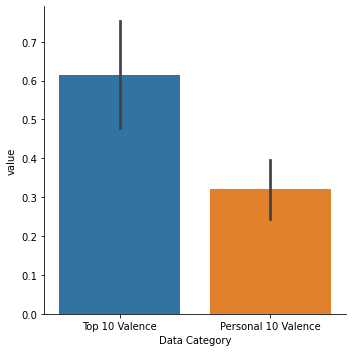

In [46]:
sb.catplot(x="Data Category", y="value",data=a,kind="bar")

The above graph compares the average valence between the Top 10 tracks of the week of 4/21/22, and my personal top 10 tracks listened to during the same period. As we can see, there is a significant negative different between my personal tracks and the top 10. The vertical bars inside each bar are "error bars", which represent one standard deviation of uncertainty. Even with this measurement accounted for in the graph, there is a significant difference between the valence values of my personal music and the top 10 tracks.

<AxesSubplot:xlabel='Personal 10 Tempo', ylabel='Personal 10 Valence'>

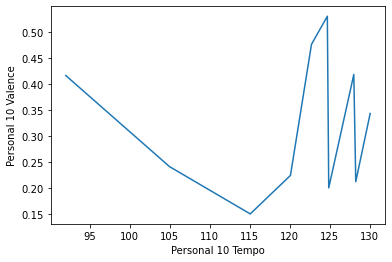

In [47]:
# visualisation for question 2
# “Does an increase in tempo mean an increase in valence?” 
sb.lineplot(x="Personal 10 Tempo",y="Personal 10 Valence",data=musicDataFrame)

This line plot graphs the valence and tempo from my personal top 10 tracks. The graph begins with a steady negative trend. As valence goes down, tempo increases. Then, there are sharp increases in valence within the higher tempos presented in the data. From this data, we can confirm that an increase in tempo does not cause a definite increase in valence. The unsteady direction of this graph could be explained by the different genres of the tracks. With the top 10 tracks from the listening charts, all songs used for data gathering are Pop, whereas I chose some electronic music and some metal music. 

<AxesSubplot:xlabel='Top 10 Tempo', ylabel='Top 10 Dance'>

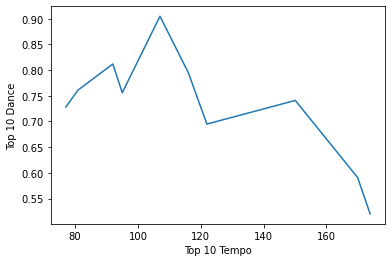

In [48]:
# visualisation for question 3
# “Does an increase in tempo mean an increase in danceability?”
sb.lineplot(x="Top 10 Tempo",y="Top 10 Dance",data=musicDataFrame)

This line plot graphs the danceability and tempo from the top 10 tracks from the listening charts. The graph shows no definite trend between tempo and danceability. This could be explained by the other measurement Spotify gathers for each song, such as energy, liveness, and speechiness.